In [ ]:
#Slides for 16 Sept

#These slides reproduce the examples in Taylor resulting in Figures 5.23 and 5.25.

In [1]:
#Determine Fourier coefficients
#These are for the "rectangular pulse"

import numpy as np

fMax = 1
tau = 1
delta_tau = 0.25

a0 = fMax * delta_tau / tau

def fourier_coefficient(n):
    omega = 2 * np.pi / tau
    return 2 * (fMax / (np.pi * n)) * np.sin(np.pi * n * delta_tau / tau)

# Example usage:
n = 1
coefficient_a = fourier_coefficient(n)

print("a0 =", a0)
print("a (n =", n, ") =", coefficient_a)


a0 = 0.25
a (n = 1 ) = 0.45015815807855303


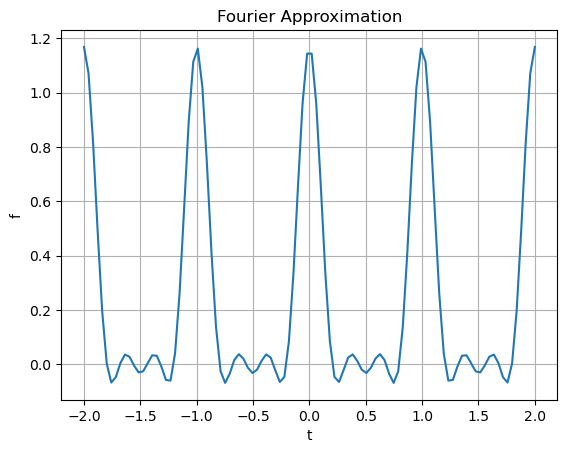

In [2]:
#Plot the Fourier approximation
#I think the coefficients in Taylor (5.89) are incorrect

import numpy as np
import matplotlib.pyplot as plt

tau = 1
fMax = 1
delta_tau = 0.25
omega = 2 * np.pi / tau

# Calculate Fourier coefficients
nMax = 3
a0 = fMax * delta_tau / tau
coefficients_a = [2 * (fMax / (np.pi * n)) * np.sin(np.pi * n * delta_tau / tau) for n in range(1, nMax + 1)]

# Fourier approximation function
def f(t):
    return a0 + sum([a * np.cos(n * omega * t) for n, a in enumerate(coefficients_a, start=1)])

# Create data for plotting
t_values = np.linspace(-2, 2, 100)
f_values = [f(t) for t in t_values]

# Plot the Fourier approximation
plt.plot(t_values, f_values)
plt.xlabel('t')
plt.ylabel('f')
plt.title('Fourier Approximation')
plt.grid(True)
plt.show()


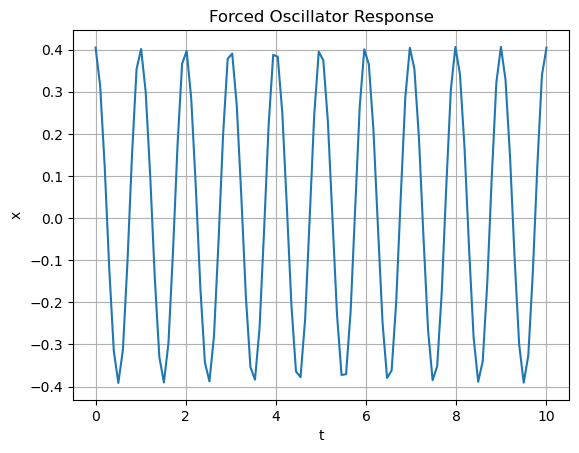

In [6]:
# Now apply this to a forced oscillator
import numpy as np
import matplotlib.pyplot as plt

tau0 = 1
beta = 0.2
omega0 = 2 * np.pi / tau0

a = 1.0  # Replace with the desired value of 'a'

def calculate_A(n, omega):
    numerator = (omega0**2 - n**2 * omega**2)**2 + 4 * beta**2 * n**2 * omega**2
    denominator = np.sqrt(numerator)
    return a / denominator

def calculate_delta(n, omega):
    return np.arctan((omega0**2 - n**2 * omega**2) / (2 * beta * n * omega))

def calculate_x(n_max, t):
    x0 = a0 / omega0**2
    x = x0
    omega = 2 * np.pi / tau
    for n in range(1, n_max + 1):
        A = calculate_A(n, omega)
        delta = calculate_delta(n, omega)
        cos_factor = np.cos(n * omega * t - delta)
        x += A * cos_factor
    return x

# Define the time range
t_values = np.linspace(0, 10, 100)

# Calculate x for each time value
x_values = [calculate_x(5, t) for t in t_values]

# Plot the forced oscillator response
plt.plot(t_values, x_values)
plt.xlabel('t')
plt.ylabel('x')
plt.title('Forced Oscillator Response')
plt.grid(True)
plt.show()



In [12]:
# Evaluate for four choices of the driving period

# Compare coefficients to those tabulated in Taylor

import numpy as np

tau0 = 1
beta = 0.2
omega0 = 2 * np.pi / tau0

a = 1.0  # Replace with the desired value of 'a'

def calculate_A(n, omega):
    numerator = (omega0**2 - n**2 * omega**2)**2 + 4 * beta**2 * n**2 * omega**2
    denominator = np.sqrt(numerator)
    return a / denominator

def calculate_delta(n, omega):
    return np.arctan((omega0**2 - n**2 * omega**2) / (2 * beta * n * omega))

def calculate_x(n_max, tau):
    x0 = a0 / omega0**2
    x = x0
    omega = 2 * np.pi / tau
    t_values = np.linspace(0, 10, 100)  # Define the values of t
    for t in t_values:
        for n in range(1, n_max + 1):
            A = calculate_A(n, omega)
            delta = calculate_delta(n, omega)
            cos_factor = np.cos(n * omega * t - delta)
            x += A * cos_factor
    return x

tau_values = [tau0, 1.5 * tau0, 2 * tau0, 2.5 * tau0]
x_values = []

for tau in tau_values:
    x_values_tau = calculate_x(5, tau)
    x_values.append(x_values_tau)

# Print the results
for i, tau in enumerate(tau_values):
    print(f"For tau = {tau}:")
    print(x_values[i])
    print()


For tau = 1:
0.40469583961461525

For tau = 1.5:
0.07287166085538826

For tau = 2:
0.4076936845297153

For tau = 2.5:
0.028120987439146285



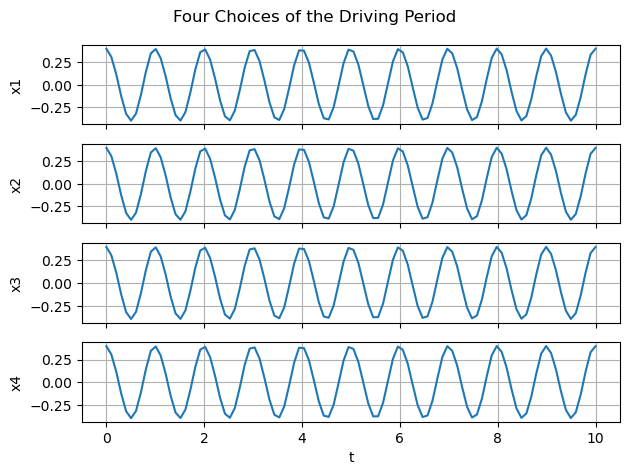

In [16]:
# Make the plots in Figure 5.25

import numpy as np
import matplotlib.pyplot as plt

def calculate_x(n_max, tau):
    t_values = np.linspace(0, 10, 100)  # Define the values of t
    x = np.zeros_like(t_values)  # Initialize x with zeros
    for t_idx, t in enumerate(t_values):
        for n in range(1, n_max + 1):
            A = calculate_A(n, omega)
            delta = calculate_delta(n, omega)
            x[t_idx] += A * np.cos(n * omega * t - delta)
    return x

# Define the functions x1, x1p5, x2, and x2p5
tau0 = 1
omega0 = 2 * np.pi / tau0
tau_values = [tau0, 1.5 * tau0, 2 * tau0, 2.5 * tau0]

t_values = np.linspace(0, 10, 100)

fig, axs = plt.subplots(len(tau_values), 1, sharex=True)

for i, tau in enumerate(tau_values):
    x = calculate_x(5, tau)
    axs[i].plot(t_values, x)
    axs[i].set_ylabel(f'x{i+1}')
    axs[i].grid(True)

axs[-1].set_xlabel('t')
plt.suptitle('Four Choices of the Driving Period')
plt.tight_layout()
plt.show()


